<a href="https://colab.research.google.com/github/georgeaaron7/ML/blob/main/Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving covid19_Confirmed_dataset.csv to covid19_Confirmed_dataset (2).csv
Saving covid19_deaths_dataset.csv to covid19_deaths_dataset (1).csv
Saving worldwide_happiness_report.csv to worldwide_happiness_report (1).csv


importing the data set


In [ ]:
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

deleting useless columns

In [ ]:
df = dataset.drop(["Lat","Long"],axis=1,inplace = True)
dataset.head()

aggregating rows by country

In [ ]:
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

In [ ]:
corona_dataset_aggregated.shape
numeric_columns = corona_dataset_aggregated.select_dtypes(include=["int64", "float64"]).columns

visualising the data

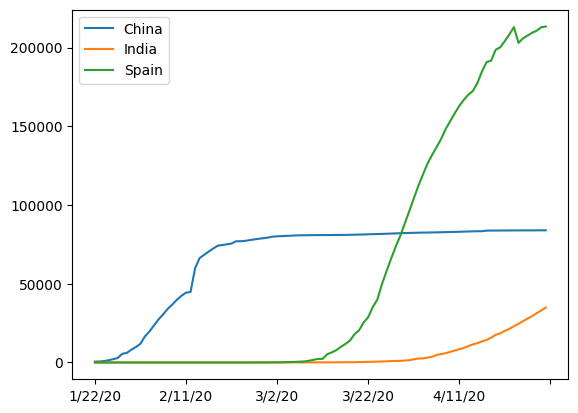

In [ ]:
corona_dataset_aggregated.loc["China"][numeric_columns].plot()
corona_dataset_aggregated.loc["India"][numeric_columns].plot()
corona_dataset_aggregated.loc["Spain"][numeric_columns].plot()
plt.legend()

Calculating the first derivative of the curve

In [ ]:
corona_dataset_aggregated.loc["China"][numeric_columns].diff().plot()
corona_dataset_aggregated.loc["India"][numeric_columns].diff().plot()
corona_dataset_aggregated.loc["Spain"][numeric_columns].diff().plot()

Maximum infection rate

In [ ]:
corona_dataset_aggregated.loc["China"][numeric_columns].diff().max()

15136

In [ ]:
corona_dataset_aggregated.loc["India"][numeric_columns].diff().max()

1893

In [ ]:
corona_dataset_aggregated.loc["Spain"][numeric_columns].diff().max()

9630

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
  max_infection_rates.append(corona_dataset_aggregated.loc[c][numeric_columns].diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates

In [ ]:
corona_dataset_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5


creating a new dataframe

In [ ]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])

In [ ]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5
...,...
West Bank and Gaza,66
Western Sahara,4
Yemen,5


Importing happiness dataset

In [ ]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

dropping the useless columns

In [ ]:
useless_cols = [ "Overall rank" , "Score" , "Generosity",  "Perceptions of corruption"]

In [ ]:
happiness_report.drop(useless_cols,axis=1,inplace=True)

In [ ]:
happiness_report.set_index("Country or region",inplace = True)

In [ ]:
happiness_report

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


joining the datasets

In [ ]:
data = corona_data.join(happiness_report, how = "inner")
data

In [ ]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


visualising the final data

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

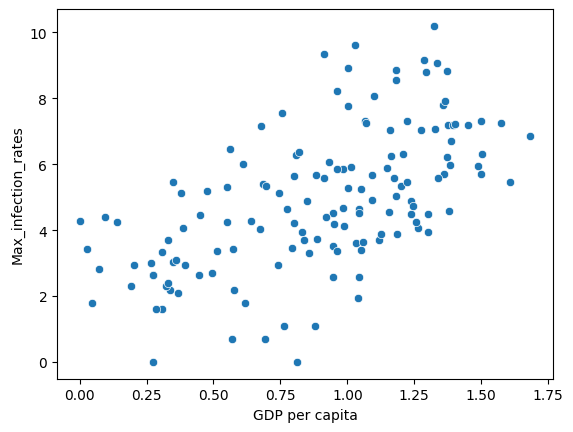

In [ ]:
y_log = np.log(y)
sns.scatterplot(x="GDP per capita", y=y_log, data=data)

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

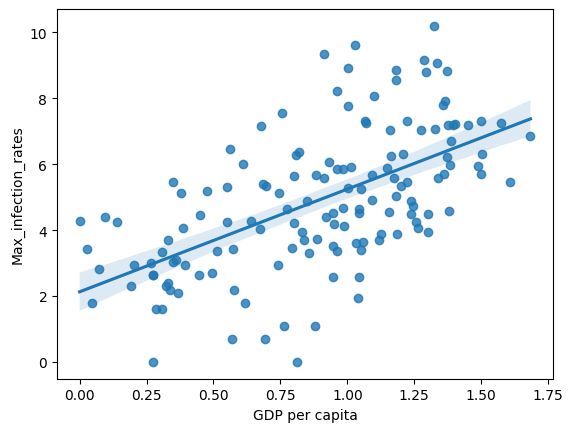

In [ ]:
sns.regplot(x="GDP per capita", y=np.log(y), data=data)

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

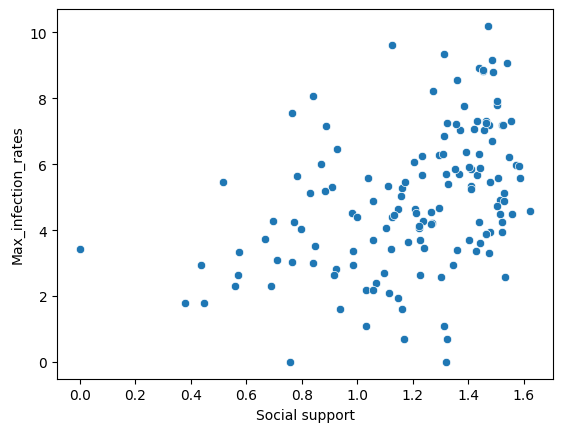

In [ ]:
y_log = np.log(y)
sns.scatterplot(x="Social support", y=y_log, data=data)

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

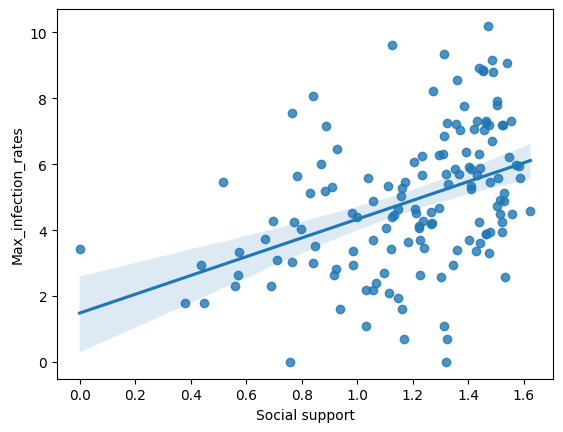

In [ ]:
sns.regplot(x="Social support", y=np.log(y), data=data)

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

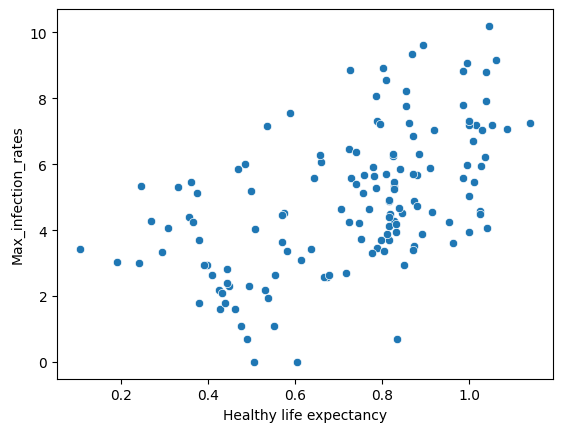

In [ ]:
y_log = np.log(y)
sns.scatterplot(x="Healthy life expectancy", y=y_log, data=data)

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

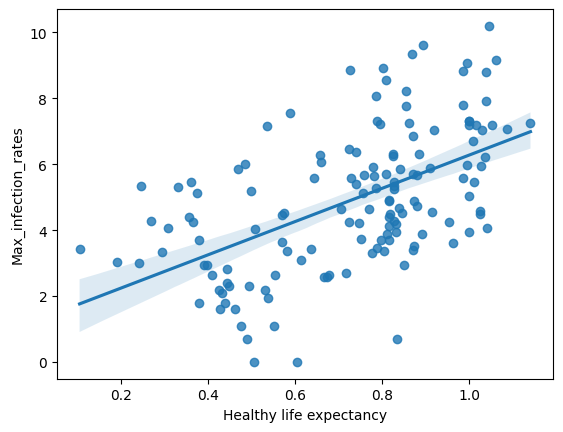

In [ ]:
sns.regplot(x="Healthy life expectancy", y=np.log(y), data=data)

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

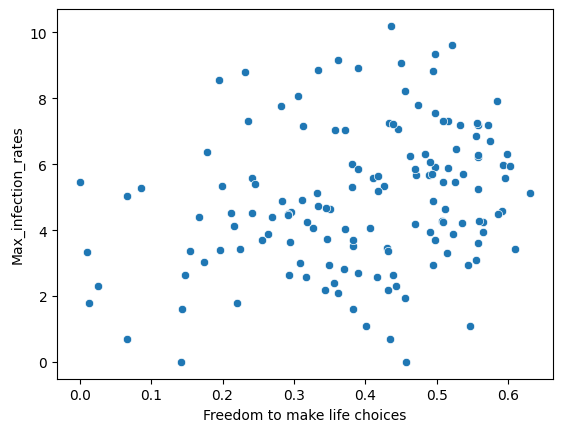

In [ ]:
y_log = np.log(y)
sns.scatterplot(x="Freedom to make life choices", y=y_log, data=data)

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

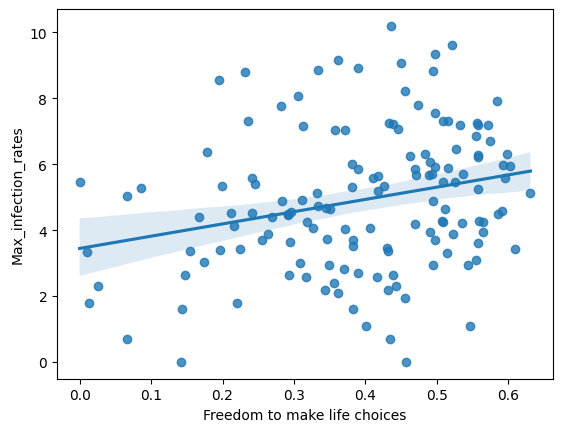

In [ ]:
sns.regplot(x="Freedom to make life choices", y=np.log(y), data=data)